# Module 2 - Homework

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [2]:
df = pd.read_csv('laptops.csv')

In [3]:
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [4]:
df.dtypes

Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object

## Preparing the Dataset

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [7]:
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [8]:
restrict_columns = ['ram', 'storage', 'screen', 'final_price']
df = df[restrict_columns] # dataframe with specific columns

In [9]:
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


Checking for long-tail after applying log1p

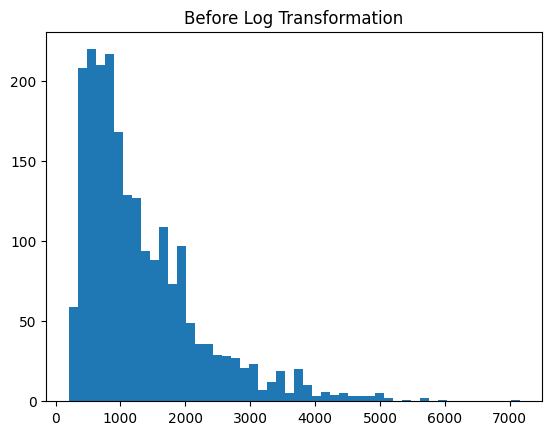

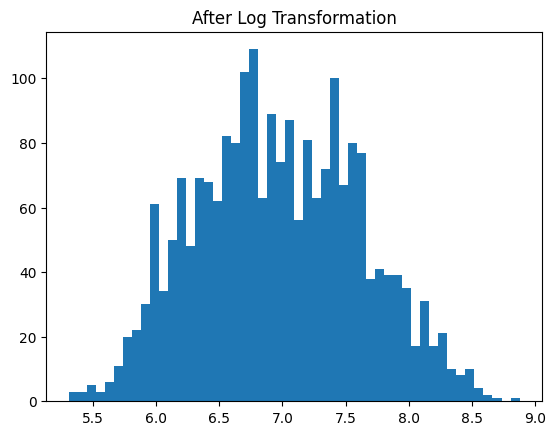

In [10]:
plt.hist(df.final_price, bins=50)
plt.title("Before Log Transformation")
plt.show()

# Histogram after log transformation
plt.hist(np.log1p(df.final_price), bins=50)  # Added 1 to avoid log(0)
plt.title("After Log Transformation")
plt.show()

In [11]:
prices_logs = np.log1p(df.final_price) # Assigning the log to var

## Question 1 
There's one column with missing values. What is it?

In [12]:
df.isnull().sum() # screen

ram            0
storage        0
screen         4
final_price    0
dtype: int64

## Question 2
What's the median (50% percentile) for variable 'ram'

In [13]:
df.ram.describe() # 16

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

- Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [14]:
n = len(df) # taking the total rows

n_val = int(n * 0.2) # validation: taking 20% from n (the main dataset) and rounding up using int()
n_test = int(n * 0.2) # test: # taking 20% from n (the main dataset) and rounding up using int()
#n_train = int(n * 0.6) using this will cause rounding issues and not matching the total rows in original dataset
n_train = n - n_val - n_test # subtracting the total number of rows from new datasets and retaining the remanining rows for train dataset
n, n_val + n_test + n_train # both the dataset are same in number of rows

(2160, 2160)

In [15]:
idx = np.arange(n)
np.random.seed(42) # seed 42
np.random.shuffle(idx) # shuffling index
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [16]:
df_train = df.iloc[idx[:n_train]] # assigning the the shuffled row index to the dataset
df_val = df.iloc[idx[n_train:n_train+n_val]] 
df_test = df.iloc[idx[n_train+n_val:]]

In [17]:
df_train = df_train.reset_index(drop=True) # dropping index columns as we don't need them
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00
...,...,...,...,...
1291,8,256,14.0,549.00
1292,32,1000,16.0,1999.00
1293,16,512,15.6,1059.00
1294,16,512,14.0,1671.00


In [18]:
y_train = np.log1p(df_train.final_price.values) # converting the price into log and using .values to convert them into an array
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)
y_train

array([7.024907  , 5.30851519, 6.90649448, ..., 6.96602419, 7.42177579,
       6.96318999])

In [19]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

## Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [20]:
df_train.isnull().sum() # nan values

ram        0
storage    0
screen     3
dtype: int64

In [21]:
df_train_nan_0 = df_train.fillna(0)
df_train_nan_0.isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [22]:
df_train_nan_mean = df_train.copy()
df_train_nan_mean['screen'] = df_train['screen'].fillna(df_train['screen'].mean())
df_train_nan_mean.isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [23]:
df_val_nan_0 = df_val.fillna(0)
df_val_nan_mean = df_val.copy()
df_val_nan_mean['screen'] = df_val['screen'].fillna(df_train['screen'].mean()) # using the mean from training column


In [24]:
def train_linear_regression(X, y):

    # Add a bias term (column of ones) to the feature matrix X
    X_with_bias = np.c_[np.ones(X.shape[0]), X]  # Adding a column of 1s to account for bias

    # Apply the Normal Equation: theta = (X^T * X)^-1 * X^T * y
    # This gives us the best-fitting parameters that minimize the cost function
    
    theta = np.linalg.inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(y)
    
    # First term in theta is the bias (intercept), the rest are the weights
    b = theta[0]       # Bias
    w = theta[1:]      # Weights (Coefficients)
    
    return b, w

In [25]:
def rmse(y_actual, y_pred):
    se = (y_actual - y_pred) ** 2 # we can just subtract two np arrays without looping. SE = Squared Error
    mse = se.mean() # .mean() to get an average. MSE = Mean Squared Error
    return np.sqrt(mse) # Now this is Root Mean Squared Error
    

Comparing the difference between fillna 0 and mean datasets. Also creating a function to easily prepare our X feature matrix with values 

In [26]:
def prepare_X(df): # A functtion to prepare dataset everytime
    df = df.copy()
    X = df.values
    return X

In [27]:
X_train_nan_0 = prepare_X(df_train_nan_0)
w0, w = train_linear_regression(X_train_nan_0, y_train) # this was the training dataset
X_val = prepare_X(df_val_nan_0) # this was the validation dataset
y_pred = w0 + X_val.dot(w)
score_nan_0 = rmse(y_val, y_pred)

# Now for dataset with mean values

X_train_nan_mean = prepare_X(df_train_nan_mean)
w0, w = train_linear_regression(X_train_nan_mean, y_train) 
X_val = prepare_X(df_val_nan_mean) 
y_pred = w0 + X_val.dot(w)
score_nan_mean = rmse(y_val, y_pred)
print(f'Dataset with mean: {round(score_nan_mean, 2)}\nDataset with fillna 0: {round(score_nan_0, 2)}') # both are equally good

Dataset with mean: 0.43
Dataset with fillna 0: 0.43


## Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [28]:
def prepare_X(df): # A functtion to prepare dataset everytime
    df = df.copy()
    df = df.fillna(0)
    X = df.values
    return X

In [29]:
import numpy as np

def train_linear_regression_reg(X, y, r=0.001): # the r here is a parameter to control our regularization

    # Performs Linear Regression to find the weights and bias.

    # XTX = XTX + r * np.eye(XTX.shape[0])

    # Add a bias term (column of ones) to the feature matrix X
    X_with_bias = np.c_[np.ones(X.shape[0]), X]  # Adding a column of 1s to account for bias

    # Apply the Normal Equation: theta = (X^T * X)^-1 * X^T * y
    # This gives us the best-fitting parameters that minimize the cost function

    XTX = X_with_bias.T.dot(X_with_bias)
    XTX += r * np.eye(XTX.shape[0])
    
    theta = np.linalg.inv(XTX).dot(X_with_bias.T).dot(y)
    
    # First term in theta is the bias (intercept), the rest are the weights
    b = theta[0]       # Bias
    w = theta[1:]      # Weights (Coefficients)
    
    return b, w



In [30]:
print("Before removing the log1p")
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r) # this was the training dataset
    
    X_val = prepare_X(df_val) # this was the validation dataset
    y_pred = w0 + X_val.dot(w) 
    score = rmse(y_val, y_pred)
    print(f'r is: {r}, Weights are: {w0}, Score is: {round(score, 2)}')

Before removing the log1p
r is: 0, Weights are: 6.72716370611504, Score is: 0.43
r is: 0.01, Weights are: 6.7210043332629805, Score is: 0.43
r is: 0.1, Weights are: 6.666075503830172, Score is: 0.43
r is: 1, Weights are: 6.162616499462939, Score is: 0.43
r is: 5, Weights are: 4.616086176498074, Score is: 0.46
r is: 10, Weights are: 3.5167547207940193, Score is: 0.51
r is: 100, Weights are: 0.6849263362658934, Score is: 0.67


In [31]:
print("After removing the log1p from dataset")
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r) # this was the training dataset
    
    X_val = prepare_X(df_val) # this was the validation dataset
    y_pred = w0 + X_val.dot(w) 
    y_pred_original = np.expm1(y_pred)
    y_val_original = np.expm1(y_val)
    score = rmse(y_val_original, y_pred_original)
    print(f'r is: {r}, Weights are: {w0}, Score is: {round(score, 2)}')

After removing the log1p from dataset
r is: 0, Weights are: 6.72716370611504, Score is: 716.51
r is: 0.01, Weights are: 6.7210043332629805, Score is: 716.53
r is: 0.1, Weights are: 6.666075503830172, Score is: 716.74
r is: 1, Weights are: 6.162616499462939, Score is: 720.41
r is: 5, Weights are: 4.616086176498074, Score is: 744.13
r is: 10, Weights are: 3.5167547207940193, Score is: 772.71
r is: 100, Weights are: 0.6849263362658934, Score is: 908.73


## Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [32]:
def split_dataset(df, seed):
    
    n = len(df)
    df = df.copy()
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    # Assigning indexes for each dataset split
    df_train_seed = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val_seed = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test_seed = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

    # Convert final_price to log scale and extract target values
    y_train_seed = df_train_seed.pop('final_price').values
    y_val_seed = df_val_seed.pop('final_price').values
    y_test_seed = df_test_seed.pop('final_price').values

    return df_train_seed, df_val_seed, df_test_seed, y_train_seed, y_val_seed, y_test_seed

In [33]:
score = []
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(df, i)
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val) 
    y_pred = w0 + X_val.dot(w)
    score.append(rmse(y_val, y_pred))
    print(f"The seed is {i} and RMSE score is {rmse(y_val, y_pred)}\n")


print("Total RMSE Scores: ", score)
std = np.std(score)
print(std)
print(f'\nTotal std is {round(std, 3)}') # 29.176

The seed is 0 and RMSE score is 565.4520868770965

The seed is 1 and RMSE score is 636.7985423056713

The seed is 2 and RMSE score is 588.9558697907975

The seed is 3 and RMSE score is 597.8148920012538

The seed is 4 and RMSE score is 571.9627915111048

The seed is 5 and RMSE score is 573.2383256618931

The seed is 6 and RMSE score is 647.3438328407295

The seed is 7 and RMSE score is 550.4398184485883

The seed is 8 and RMSE score is 587.3335036169867

The seed is 9 and RMSE score is 576.1017929433073

Total RMSE Scores:  [565.4520868770965, 636.7985423056713, 588.9558697907975, 597.8148920012538, 571.9627915111048, 573.2383256618931, 647.3438328407295, 550.4398184485883, 587.3335036169867, 576.1017929433073]
29.17649125829587

Total std is 29.176


## Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [34]:
df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(df, 9) # seed = 9

In [35]:
df_train_val = pd.concat([df_train, df_val])
df_train_val = df_train_val.reset_index(drop=True)
df_train_val

,ram,storage,screen
0,32,1000,15.6
1,8,512,13.3
2,8,512,15.6
3,32,1000,17.3
4,16,1000,16.0
...,...,...,...
1723,16,512,14.0
1724,16,512,13.3
1725,8,256,15.6
1726,16,512,15.6


In [36]:
y_train_val = np.concatenate([y_train, y_val])

In [37]:
X_train_val = prepare_X(df_train_val)
w0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001) 
X_test = prepare_X(df_test) 
y_pred = w0 + X_test.dot(w)  
score = rmse(y_test, y_pred)
score

608.60998220496